In [12]:
#Importar librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg

In [13]:
#Carga y filtro de los datos por tipo de magnitud

df_catalogo = pd.read_csv('catalogo_sismos.csv')
#filtro1=df_catalogo[df_catalogo['TIPO MAGNITUD']=='Ml']
filtro1=df_catalogo[df_catalogo['TIPO MAGNITUD']=='MLr']

In [14]:
#Filtro de los datos por fecha

#filtro_fecha = filtro1[filtro1['ANO'] >= 2000]
#filtro_fecha = filtro1[filtro1['ANO'] <= 2010]
filtro_fecha = filtro1[filtro1['ANO'] > 2010]

In [15]:
#Cálculo de las frecuencias por magnitud

counts = filtro_fecha['MAGNITUD'].value_counts().to_dict()

In [16]:
#Frecuencia acumulada por magnitud

frecuencia = pd.Series(counts, name='Frec')
frecuencia.index.name = 'Magnitud'

frecuencia.to_csv('Frecuencia_acumulada.csv')
df_frecuencia = pd.read_csv('Frecuencia_acumulada.csv')

In [17]:
# Ordenar la información de mayor a menor magnitud

by_magn = df_frecuencia.sort_values('Magnitud', ascending=False)
df_final=pd.DataFrame(by_magn)
cumulative = np.cumsum(df_final['Frec'])
concat = pd.concat([df_final,cumulative], axis=1)
df_final2=pd.DataFrame(concat)
df_final2.columns = ['Magnitud', 'Frecuencia', 'Frecuencia_acum']

In [18]:
#Definición de la completitud y función de regresión

Completitud1=1.5
valo_1= df_final2['Magnitud'] > Completitud1
y=df_final2['Frecuencia_acum'][valo_1]
x=df_final2['Magnitud'][valo_1]

def pred1 (x0, x):
    return 10**(x0[0] + (x0[1]*x))

In [19]:
#Regresión lineal por la norma L1

from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(x, np.log10(y))
r2_value=r_value*r_value
lreg=np.vstack((intercept, slope, r2_value))
lreg

array([[ 5.71513865],
       [-1.39207778],
       [ 0.97298058]])

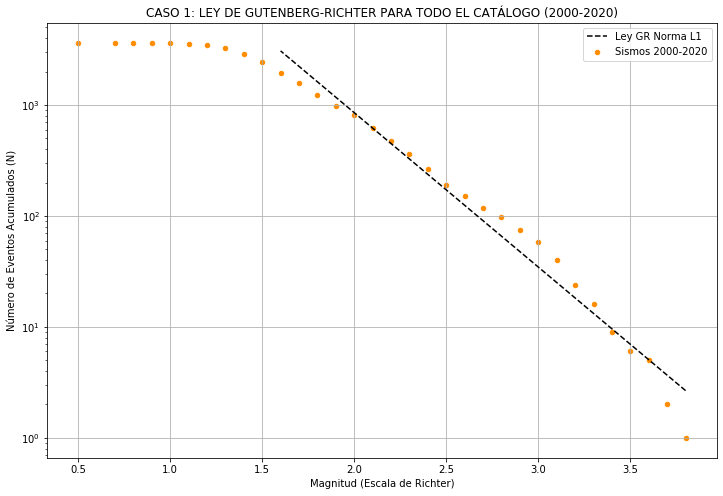

In [20]:
#Gráfica de la Ley Gutenberg-Richter

df_final2.plot.scatter(x="Magnitud", y="Frecuencia_acum", c="darkorange", figsize=(12,8), label='Sismos 2000-2020')
plt.title('CASO 1: LEY DE GUTENBERG-RICHTER PARA TODO EL CATÁLOGO (2000-2020)')
plt.xlabel('Magnitud (Escala de Richter)')
plt.ylabel('Número de Eventos Acumulados (N)')
plt.yscale("log")
plt.plot(x, pred1(lreg, x), 'k--',label='Ley GR Norma L1')
plt.legend()
plt.grid()

#plt.savefig('caso3_MLr.png', dpi=400)  

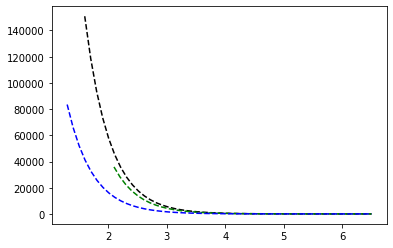

In [21]:
#Comparación de las regresiones por caso

magn=np.linspace(1.6,6.5,49)
magn2=np.linspace(2.1,6.5,44)
magn3=np.linspace(1.3,6.5,52)

caso1=10**(6.8127-1.0213*magn)
caso2=10**(6.6930-1.0183*magn2)
caso3=10**(6.2311-1.0073*magn3)

plt.plot(magn, caso1, 'k--',label='Ley GR Norma L1')
plt.plot(magn2, caso2, 'g--',label='Ley GR Norma L1')
plt.plot(magn3, caso3, 'b--',label='Ley GR Norma L1')

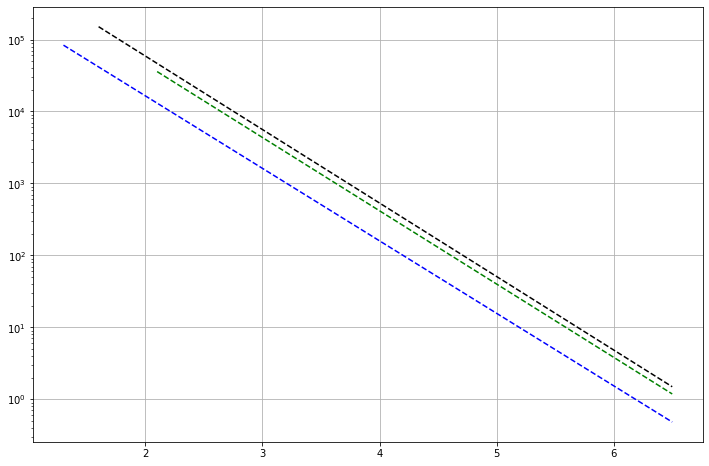

In [22]:
#Gráfica de comparación entre las regresiones

from matplotlib.pyplot import figure

figure(figsize=(12, 8))
plt.plot(magn, caso1, 'k--',label='Ley GR Norma L1')
plt.plot(magn2, caso2, 'g--',label='Ley GR Norma L1')
plt.plot(magn3, caso3, 'b--',label='Ley GR Norma L1')
plt.yscale("log")
plt.grid()

#plt.savefig('comparacion.png', dpi=400)  